In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

## Random Forest Regression

In [14]:
df=pd.read_csv(r"C:\Users\goex1\Desktop\DS Projekte für GITHUB\Mobile Phone\smartphones_data.csv.csv")

#overview of dataset
df.head(5)


,brand_name,Name,Price,RAM,OS,storage,Battery_cap,has_fast_charging,has_fingerprints,has_nfc,has_5g,processor_brand,num_core,primery_rear_camera,Num_Rear_Cameras,primery_front_camera,num_front_camera,display_size(inch),refresh_rate(hz),display_types
0,vivo,vivo v50,34999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,50.0,1,6.77,120.0,amoled display
1,realme,realme p3 pro,21999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,16.0,1,6.83,120.0,amoled display
2,realme,realme 14 pro plus,27999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,3,32.0,1,6.83,120.0,oled display
3,samsung,samsung galaxy s25 ultra,129999,12.0,android,256.0,5000,Yes,Yes,Yes,Yes,snapdragon,8.0,200.0,4,12.0,1,6.90,120.0,amoled display
4,vivo,vivo t3 pro,22999,8.0,android,128.0,5500,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,16.0,1,6.77,120.0,amoled display


In [15]:
print("rows and columns in dataset:", df.shape)

rows and columns in dataset: (3260, 20)


## Build Pipeline for categorial and numerical features

In [16]:
df_metric=df[['RAM', 'storage', 'Num_Rear_Cameras', 'primery_front_camera', 'num_front_camera', 'display_size(inch)','refresh_rate(hz)']]
df_categoric=df[['OS','has_fast_charging','has_fingerprints','has_nfc','has_5g','processor_brand']]

In [17]:
numerical_pipeline= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Schritt 1 bei numerischen Variablen
    ('scaler', StandardScaler())                    # Schritt 2 bei numerischen Variablen
])

categorical_pipeline= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Schritt 1 bei kategorischen Variablen
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # Schritt 2 bei kategorischen Variablen
])

## Join Pipelines with Columntransformer

In [18]:
preprocessor=ColumnTransformer([('num', numerical_pipeline,df_metric.columns),('cat', categorical_pipeline, df_categoric.columns)])

In [19]:
Pipeline1=Pipeline([('preprocessor', preprocessor),
                    ('model', RandomForestRegressor())
])

In [20]:
X = df[df_metric.columns.tolist() + df_categoric.columns.tolist()]
y=df['Price']

In [21]:
df_metric.corrwith(y).sort_values(ascending=False)

storage                 0.737064
RAM                     0.539022
Num_Rear_Cameras        0.313599
refresh_rate(hz)        0.302170
primery_front_camera    0.289642
display_size(inch)      0.284860
num_front_camera        0.163241
dtype: float64

## Train test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
Pipeline1.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['RAM', 'storage', 'Num_Rear_Cameras', 'primery_front_camera',
       'num_front_camera', 'display_size(inch)', 'refresh_rate(hz)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['OS', 'has_fast_charging', 'has_fingerprints', 'has_nfc', 'has_5g',
       'processor_brand'],
      dtype='object'))])),
                ('model', RandomForestRegressor())])

## Prediction

In [24]:
y_prediction=Pipeline1.predict(X_test)



## feature importance


In [25]:

# Feature Importances abrufen
importances = Pipeline1.named_steps['model'].feature_importances_

# Feature-Namen abrufen (nach Preprocessing)
feature_names = Pipeline1.named_steps['preprocessor'].get_feature_names_out()

# DataFrame erstellen
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(5)  # Top 5 Features


,Feature,Importance
1,num__storage,0.240514
14,cat__has_nfc_No,0.168091
15,cat__has_nfc_Yes,0.155426
3,num__primery_front_camera,0.092762
0,num__RAM,0.081557


## Visual of feature importance

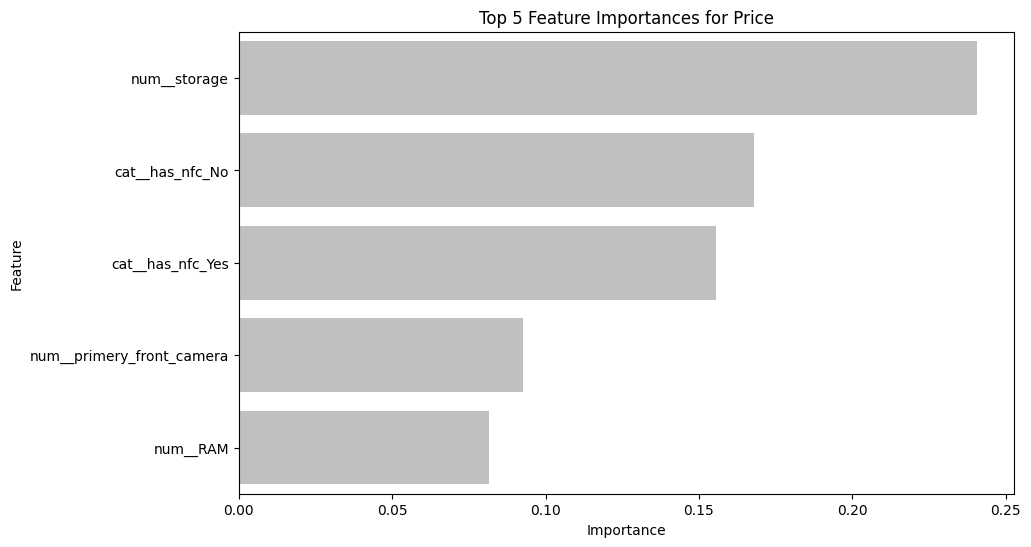

In [26]:

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(5), color='silver')
plt.title("Top 5 Feature Importances for Price")
plt.show()


## Model Performance

In [27]:

print("R²:", r2_score(y_test, y_prediction))
print ("MAE:", mean_absolute_error(y_test,y_prediction))
print ("MSE:", mean_squared_error(y_test,y_prediction))


R²: 0.802956196942168
MAE: 4931.399144182357
MSE: 93628073.03085785


## Linear Regression

In [28]:
Pipeline2=Pipeline([('preprocessor', preprocessor),
                    ('model', LinearRegression())
])

In [29]:
Pipeline2.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['RAM', 'storage', 'Num_Rear_Cameras', 'primery_front_camera',
       'num_front_camera', 'display_size(inch)', 'refresh_rate(hz)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['OS', 'has_fast_charging', 'has_fingerprints', 'has_nfc', 'has_5g',
       'processor_brand'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [30]:
y_prediction_lr=Pipeline2.predict(X_test)

In [31]:
coefficients = Pipeline2.named_steps['model'].coef_
intercept = Pipeline2.named_steps['model'].intercept_

print(coefficients)
print (intercept)

[  3534.72142271  12154.66045832   1221.23085028  -2525.0377986
   1832.13906187    442.41468025   2145.38987865  -5877.42438069
  15486.17051905  -9608.74613836   2145.46677858  -2145.46677858
   4231.52101057  -4231.52101057  -5212.7783425    5212.7783425
    141.51984704   -141.51984704  15486.17051905  -5703.65182792
  33312.38959079  -4095.1069524    5849.82273409  -7476.16462955
  -7061.32268623   4922.82175767  -8206.60218952  -2002.49031664
  -3401.69420585  -6735.53740145   4549.97752618 -10178.24394057
  -9260.36797766]
36455.561979157115


In [32]:
print ("MSE=", mean_squared_error(y_test,y_prediction_lr))
print ("MAE=", mean_absolute_error(y_test,y_prediction_lr))
print ("R²=",r2_score(y_test,y_prediction_lr))

MSE= 140665692.76760468
MAE= 7178.216768007871
R²= 0.7039637561102176


## Compare Linear Regression vs Random Forest

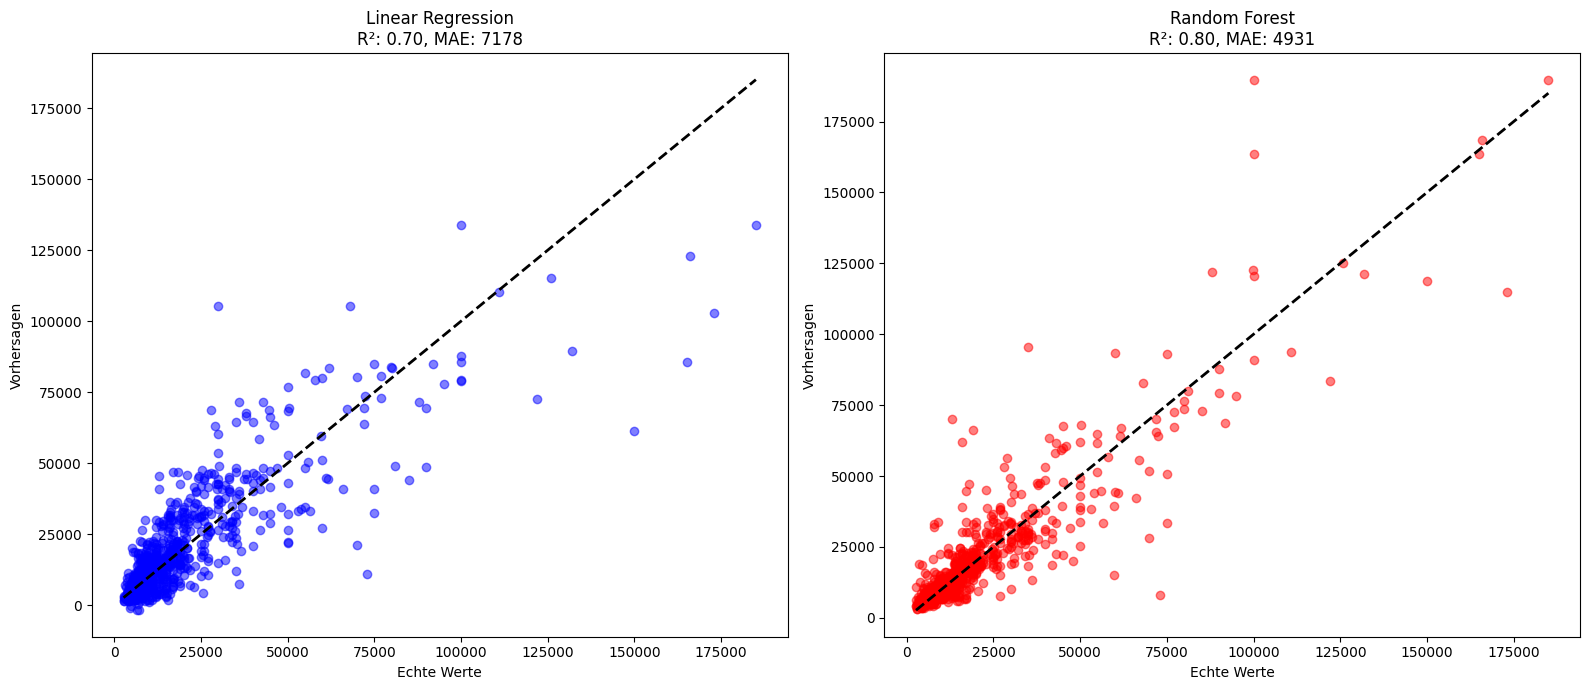

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

# Zwei Subplots nebeneinander
fig, axes = plt.subplots(1, 2, figsize=(16, 7))  # 1 Reihe, 2 Spalten

# --- Lineare Regression ---
axes[0].scatter(y_test, y_prediction_lr, color='blue', alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0].set_xlabel('Echte Werte')
axes[0].set_ylabel('Vorhersagen')
axes[0].set_title('Linear Regression\nR²: {:.2f}, MAE: {:.0f}'.format(
    r2_score(y_test, y_prediction_lr),
    mean_absolute_error(y_test, y_prediction_lr)
))

# --- Random Forest ---
axes[1].scatter(y_test, y_prediction, color='red', alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1].set_xlabel('Echte Werte')
axes[1].set_ylabel('Vorhersagen')
axes[1].set_title('Random Forest\nR²: {:.2f}, MAE: {:.0f}'.format(
    r2_score(y_test, y_prediction),
    mean_absolute_error(y_test, y_prediction)
))

plt.tight_layout()
plt.show()


## Random Forest Regression vs. Linear Regression

| Modell             | R²    | MAE   |
| ------------------ | ----- | ----- |
| Lineare Regression | 0.70 | 7178 |
| Random Forest      | 0.80 | 4931 | 


Conlcusion: Random Forest has better performance in this case!